In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# The initial input will be the numbers between -1 and 1
x = np.arange(-1, 1, 0.001)

In [3]:
# The target function is a sine curve on this interval
y = np.sin(2*np.pi*x)

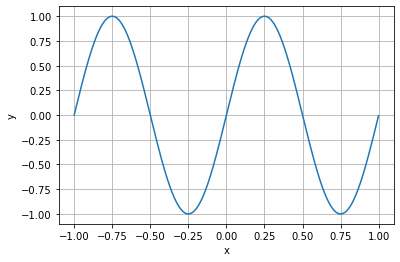

In [4]:
# Plot the target curve (a sanity check)
fig, ax = plt.subplots()

ax.plot(x, y)

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

In [5]:
# To make x and y usable by PyTorch, we need to convert them from NumPy arrays to PyTorch tensors
# dtype=torch.float32 means use 32-bit floating point numbers (in contrast to NumPy's default 64-bit floating point representation)
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1,1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

In [6]:
# The model is a net consisting of 1 hidden layer with 8 neurons that uses ReLU activation
model = nn.Sequential(nn.Linear(1, 8), nn.ReLU(), nn.Linear(8, 8), nn.ReLU(), nn.Linear(8, 1))

In [7]:
# ADAM is a good starting choice of optimizer because it doesn't need much tuning
optimizer = optim.Adam(model.parameters())

In [8]:
# The training loop:
for _ in range(0, 1000):
    model.train()
    optimizer.zero_grad() # zero out the gradients
    loss = ((y_tensor - model(x_tensor))**2).mean() # compute the loss function
    loss.backward()  # calculate the gradients
    optimizer.step() # do one parameter update using the calculated gradients

In [9]:
# Convert the model's output back to a NumPy array
y_hat = model(x_tensor).detach().view(-1).numpy()

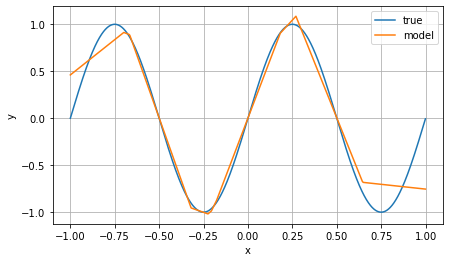

In [10]:
# Plot the predictions
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(x, y, label="true")
ax.plot(x, y_hat, label="model")

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

In [11]:
# next, suppose we only have a few points sampled---what will the model predict in-between?

In [12]:
x2 = np.random.choice(np.arange(-1, 1, 0.001), 10)
y2 = np.sin(2*np.pi*x2)

In [13]:
x2_tensor = torch.tensor(x2, dtype=torch.float32).view(-1,1)
y2_tensor = torch.tensor(y2, dtype=torch.float32).view(-1,1)

In [14]:
model = nn.Sequential(nn.Linear(1, 8), nn.ReLU(), nn.Linear(8, 8), nn.ReLU(), nn.Linear(8, 1))

In [15]:
optimizer = optim.Adam(model.parameters())

In [16]:
for _ in range(0, 1000):
    model.train()
    optimizer.zero_grad()
    loss = ((y2_tensor - model(x2_tensor))**2).mean()
    loss.backward()
    optimizer.step()

In [17]:
# compute our predictions along the entire original array of x values
y_hat = model(x_tensor).detach().view(-1).numpy()

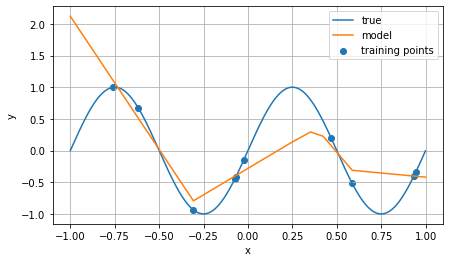

In [18]:
# plot the results
# the dots are the training points
# the blue curve is the true value
# the orange curve is the model's prediction at each value of x
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(x, y, label="true")
ax.scatter(x2, y2, label="training points")
ax.plot(x, y_hat, label="model")

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

In [19]:
# how many parameters does this model have?
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
sum([np.prod(p.size()) for p in model_parameters])

97